In [1]:
!which python

/sw/centos/anaconda3/2019.10/bin/python


In [2]:
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/sw/centos/anaconda3/2019.10/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. How to use Seaborn

## 1.1 ndarray

In [2]:
def getdata():    
    basecond = [[18, 20, 19, 18, 13, 4, 1],                
                [20, 17, 12, 9, 3, 0, 0],               
                [20, 20, 20, 12, 5, 3, 0]]    

    cond1 = [[18, 19, 18, 19, 20, 15, 14],             
             [19, 20, 18, 16, 20, 15, 9],             
             [19, 20, 20, 20, 17, 10, 0],             
             [20, 20, 20, 20, 7, 9, 1]]   

    cond2 = [[20, 20, 20, 20, 19, 17, 4],            
             [20, 20, 20, 20, 20, 19, 7],            
             [19, 20, 20, 19, 19, 15, 2]]   

    cond3 = [[20, 20, 20, 20, 19, 17, 12],           
             [18, 20, 19, 18, 13, 4, 1],            
             [20, 19, 18, 17, 13, 2, 0],            
             [19, 18, 20, 20, 15, 6, 0]]    

    return basecond, cond1, cond2, cond3

/sw/centos/anaconda3/2019.10/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


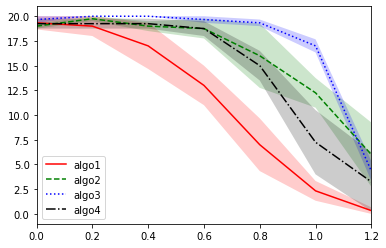

In [4]:
data = getdata()
fig = plt.figure()
xdata = np.array([0, 1, 2, 3, 4, 5, 6])/5
linestyle = ['-', '--', ':', '-.']
color = ['r', 'g', 'b', 'k']
label = ['algo1', 'algo2', 'algo3', 'algo4']

for i in range(4):    
    sns.tsplot(time=xdata, data=data[i], color=color[i], linestyle=linestyle[i], condition=label[i])

In [3]:
def smooth(data, sm=1):
    if sm > 1:
        smooth_data = []
        for d in data:
            y = np.ones(sm)*1.0/sm
            d = np.convolve(y, d, "same")

            smooth_data.append(d)

    return smooth_data

In [4]:
smooth([[1,2,100,20,20,40,60]], sm=3)

[array([ 1.        , 34.33333333, 40.66666667, 46.66666667, 26.66666667,
        40.        , 33.33333333])]

# 2. Load Data

In [5]:
result_df_hysQ = pd.read_csv("./Hysteretic_QL_5_14_9_51.csv")

In [6]:
result_df_hysQ

,Unnamed: 0,episode,reward1,reward2,length,coop,totalreward,epsilon
0,0,1,0.10,0.01,2035,1,1.1,0.995932
1,1,2,0.01,0.10,542,1,1.1,0.994849
2,2,3,0.10,0.01,195,1,1.1,0.994459
3,3,4,0.02,0.20,411,2,2.2,0.993637
4,4,5,0.10,0.01,287,1,1.1,0.993063
...,...,...,...,...,...,...,...,...
39995,39995,39996,1.00,0.10,13,10,11.0,0.000100
39996,39996,39997,1.00,0.10,11,10,11.0,0.000100
39997,39997,39998,0.10,0.01,4,1,1.1,0.000100
39998,39998,39999,0.90,0.09,14,9,9.9,0.000100


In [12]:
smooth_reward = smooth([result_df_hysQ['totalreward']], sm=50)

In [20]:
smooth_coop = smooth([result_df_hysQ['coop']], sm=50)

/sw/centos/anaconda3/2019.10/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


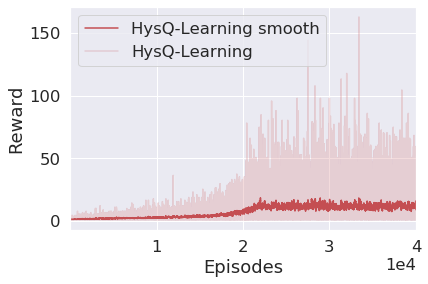

In [18]:
import pylab
fig = plt.figure()
linestyle = ['-', ':']
color = ['r', 'g']
label = ['HysQ-Learning', 'Q-Learning']
sns.set(style="darkgrid", font_scale=1.5)
sns.tsplot(
    time=list(result_df_hysQ['episode']),
    data=list(smooth_reward),
    color=color[0],
    linestyle=linestyle[0],
    condition=label[0]+' smooth')
sns.tsplot(
    time=list(result_df_hysQ['episode']),
    data=list(result_df_hysQ['totalreward']),
    color=color[0],
    linestyle=linestyle[0],
    condition=label[0],
    alpha=0.2)
xscale = np.max(result_df_hysQ['episode']) > 5e3
if xscale:
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
# pylab.yscale('log')
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend(loc='best').set_draggable(True)
plt.tight_layout(pad=0.5)
plt.show()

In [19]:
fig.savefig("HysQ_40k.png")

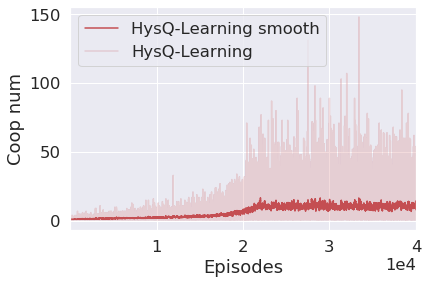

In [37]:
import pylab
fig = plt.figure()
linestyle = ['-', ':']
color = ['r', 'g']
label = ['HysQ-Learning', 'Q-Learning']
sns.set(style="darkgrid", font_scale=1.5)
sns.tsplot(
    time=list(result_df_hysQ['episode']),
    data=list(smooth_coop),
    color=color[0],
    linestyle=linestyle[0],
    condition=label[0]+' smooth')
sns.tsplot(
    time=list(result_df_hysQ['episode']),
    data=list(result_df_hysQ['coop']),
    color=color[0],
    linestyle=linestyle[0],
    condition=label[0],
    alpha=0.2)
xscale = np.max(result_df_hysQ['episode']) > 5e3
if xscale:
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
# pylab.yscale('log')
plt.xlabel("Episodes")
plt.ylabel("Coop num")
plt.legend(loc='best').set_draggable(True)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
fig.savefig("HysQ_40k_coop_num.png")

In [27]:
coop_ratio = []
coop_num_list = list(result_df_hysQ['coop'])
steps_per_episode = list(result_df_hysQ['length'])
assert len(coop_num_list) == len(steps_per_episode)
for i in range(len(coop_num_list)):
    coop_ratio.append(coop_num_list[i]/steps_per_episode[i])

In [34]:
smooth_coop_ratio = smooth([coop_ratio], sm=50)

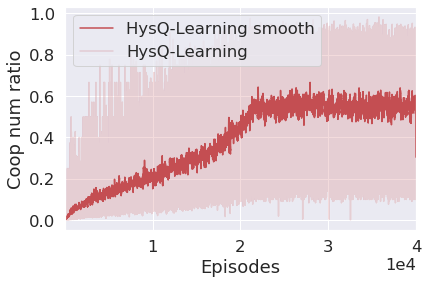

In [35]:
import pylab
fig = plt.figure()
linestyle = ['-', ':']
color = ['r', 'g']
label = ['HysQ-Learning', 'Q-Learning']
sns.set(style="darkgrid", font_scale=1.5)
sns.tsplot(
    time=list(result_df_hysQ['episode']),
    data=list(smooth_coop_ratio),
    color=color[0],
    linestyle=linestyle[0],
    condition=label[0]+' smooth')
sns.tsplot(
    time=list(result_df_hysQ['episode']),
    data=list(coop_ratio),
    color=color[0],
    linestyle=linestyle[0],
    condition=label[0],
    alpha=0.2)
xscale = np.max(result_df_hysQ['episode']) > 5e3
if xscale:
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
# pylab.yscale('log')
plt.xlabel("Episodes")
plt.ylabel("Coop num ratio")
plt.legend(loc='best').set_draggable(True)
plt.tight_layout(pad=0.5)
plt.show()

In [36]:
fig.savefig("HysQ_40k_coop_ratio.png")